# Homework 4

Before you run your homework run the code below:

In [128]:
import os
import sys
import hashlib
import pandas as pd
import numpy as np
import statsmodels.api as sm
from urllib.request import urlopen
from matplotlib import pyplot as plot
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from scipy.cluster import hierarchy 
from scipy.cluster.hierarchy import fcluster
from sklearn.linear_model import LogisticRegression




assert os.path.exists('../homeworks/HW4.ipynb')

info = sys.platform + '\n' + sys.version + '\n' + os.getcwd() + '\n' + os.getlogin()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
with open('../other/hw-4-'+name,'w') as f:
    f.write(info)

In [129]:
with open('../other/hw-4-'+name,'r') as f:
    info = f.read()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
assert os.path.exists('../other/hw-4-'+name)

## Task

Apply all of the supervised and unsupervised classification and clustering algorithms we learned so far for the [sonar dataset from UCI](http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks)).

The code for downloading the data is below. Don't load the data again and again in each subtask, refer the data as `SONAR` after you run the cell below.

In [130]:
with urlopen("https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data") as fil:
    SONAR = pd.read_csv(fil, delimiter=',', header=None)

In [131]:
SONAR.head(10)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
5,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
8,0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
9,0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


Öncelikle aynı kodu sürekli yazmamak için başlangıçta veriyi 2'ye böleceğim. Gerektiği yerde tekrardan ayırdım datayı.

In [142]:
xs = SONAR.iloc[:,0:59]
ys = SONAR.iloc[:,60]

## Subtask 1: K-Means Algorithm 


Elimizde bir sürü veri noktası var ve bu noktaları kümelere ayırcaz.Eğer çizdiğim grafik doğruysa k-means ile tek bir kümeye ayırmamız ile güzel bir sonuç verebilir. Bu yüzden ilk olarak bunu denemek istiyorum. Ayrıca verinin %25'işini test verisi olarak kullanacağım.


In [143]:
Xtrain , Xtest , Ytrain , Ytest = train_test_split(xs , ys , test_size = 0.25)

model = KMeans(n_clusters =2 , random_state=1)
model.fit(Xtrain,Ytrain)
predictions = model.predict(Xtest)
transform = {"R":1 , "M":0}
real = Ytest.map(lambda x : transform[x])
cm = confusion_matrix(real,predictions)
accuracy = accuracy_score(real,predictions)
print(cm)
print(accuracy)

[[15 15]
 [15  7]]
0.4230769230769231


## Subtask 2 : K-nn Algorithm

Şimdi de elimizdeki veri kümesini sınıflandırmak istiyorum. Burada komşularına göre sınıflandırma yapacağız. Aralarındaki mesafeye baktığımız için normalize etmemiz gerek çünkü veri noktaları arasındaki fark büyük. 

In [134]:
scaler = StandardScaler()
scaler.fit(xs)
xs = scaler.transform(xs)

Xtrain , Xtest , Ytrain , Ytest = train_test_split(xs , ys , test_size=0.25) 

model = KNeighborsClassifier(n_neighbors=3 , metric='euclidean')
model.fit(Xtrain , Ytrain)
predictions = model.predict(Xtest)
cm = confusion_matrix(Ytest,predictions)
accuracy = accuracy_score(Ytest,predictions)
print(cm)
print(accuracy)

[[25  2]
 [ 4 21]]
0.8846153846153846


## Subtask 3 : Naive Bayes Algorithm

Naive Bayes algoritması da bir sınıflandırma çeşitidir. Olasılıkta kullanılan Bayesian Kuralına çok değişkenli hale getirip ve değişkenlerini bağımsız sayarak yaptığımız bu algoritma diğer yöntemler gibi kullanılan veri kümesine bağlı olarak iyi ya da kötü sonuçlar verebilir. Ayrıca GaussianNB Gauss sürekli dağılımını kullandığı için onu kullanmak kolay ve daha iyi sonuç verdi.

In [135]:
Xtrain , Xtest , Ytrain , Ytest = train_test_split(xs , ys , test_size=0.25) 

model = GaussianNB()
model.fit(Xtrain,Ytrain)
predictions = model.predict(Xtest)
cm = confusion_matrix(Ytest,predictions)
accuracy = accuracy_score(Ytest,predictions)
print(cm)
print(accuracy)

[[18  7]
 [ 9 18]]
0.6923076923076923


## Subtask 4 : Linear Regression Algorithm


Linear regression yaparak eğer datamız lineer şekilde dağıldıysa onu daha rahat keşfetmekti ancak aşağıdaki sonuç gösteriyor ki datamız bir doğru olarak dağılmamış. Çıkan sonuç bize bunu dedi. Eğer bütün sütunları alırsak sonuç daha kötü çıkıyordu. O yüzden hepsini almadık.

In [136]:
#to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
X = SONAR.iloc[:,[9, 10, 14, 15, 16, 17, 18, 19, 20, 23, 24, 26, 34, 35, 36, 45, 46, 48]]
y = SONAR.iloc[:,60:61]
y = y.replace(to_replace=['M', 'R'], value=[0, 1])
logit_model = sm.Logit(y,X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.433829
         Iterations 7


## Subtask 5 : Hiearchical Clustering

Bütün veri noktalarını 2'ye ayırarak kümeler bunu da aralarındaki en kısa mesafeye göre yapar. Daha sonra diğer kümelerle aralarındaki uzaklığa bakar ve en küçük mesafeyi alıp tekrar küme oluşturur ve böyle gider. Algoritma böyle devam eder. Ayrıca algoritma çalıştığında farklı sonuç vermiycek çünkü zaten aradaki mesafeye bakıyor yani uzayı değiştirmediğimiz takdirde değişmeyecek.

[[26 85]
 [13 84]]
0.5288461538461539


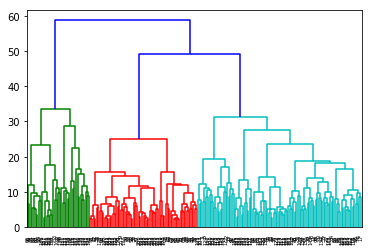

In [137]:
X = SONAR.iloc[:,0:60]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

linked = hierarchy.linkage(X, 'ward')
predicted = fcluster(linked, 2, criterion='maxclust')
dendrograms = hierarchy.dendrogram(linked)
labels1 = {"M":1, "R":2}
real = ys.map(lambda x: labels1[x])
cm=confusion_matrix(real,predicted)
print(cm)
accuracy=accuracy_score(real,predicted)
print(accuracy)

## Subtask 6 : Logistic Regression 

Supervised learning olan Logistic Regression'u elimizde veri topluluğu olduğu zaman kullanıyoruz. Linear regression'daki mantığa benziycek algoritma yalnız burda datayı eğri ile ayırcaz ve o eğri 0 ile 1 arasında değişecek.

In [138]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size=0.25)
model = LogisticRegression(random_state=0)
model.fit(Xtrain, Ytrain)
predictions = model.predict(Xtest)
cm = confusion_matrix(Ytest, predictions)
print(cm)
accuracy=accuracy_score(Ytest,predictions)
print(accuracy)

[[18  6]
 [ 5 23]]
0.7884615384615384
